In [1]:
import ssl
# For data loading and manipulation
from sklearn.datasets import fetch_openml
import numpy as np

# For building and training the model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# For evaluation and visualization
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt




In [2]:
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

In [3]:
#Load data from https://www.openml.org/d/554
#X contains the images data (features), y contains the labels (digit)
print("Fetching MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
X, y = mnist.data, mnist.target
print("Data loaded successfully.") 
print(f"data shape : {X.shape}, labels shape: {y.shape}")

Fetching MNIST dataset...
Data loaded successfully.
data shape : (70000, 784), labels shape: (70000,)


In [4]:
# Split dataset into test set and training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=0)
print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")
print(f"y:{y} , x:{X}")

Training set shape: (60000, 784), Test set shape: (10000, 784)
y:['5' '0' '4' ... '4' '5' '6'] , x:[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


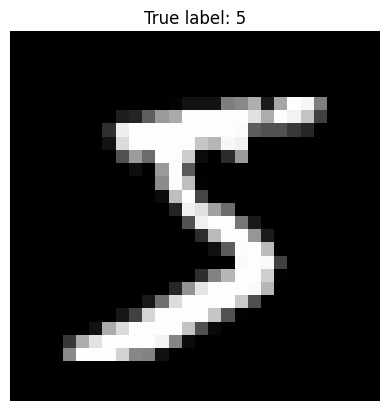

In [5]:
some_digit_index = 0
some_digit_image = X[some_digit_index].reshape(28, 28)
true_label = y[some_digit_index]

plt.imshow(some_digit_image, cmap='gray')
plt.title(f"True label: {true_label}")
plt.axis('off')
plt.show()

In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}")
# print y
print(f"First 10 labels in training set: {y_train[:10]}")

Training set shape: (56000, 784), Testing set shape: (14000, 784)
First 10 labels in training set: ['5' '4' '8' '0' '2' '6' '5' '4' '8' '3']


In [7]:
y = y.astype(np.uint8)  
# 1. Split the data into training and testing sets
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# 2. Scale the pixel values to be between 0 and 1
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

In [8]:
# Create and train the Softmax Regression model
# Using 'lbfgs' solver which is suitable for multinomial logistic regression
softmax_reg = LogisticRegression(solver="lbfgs", max_iter=1000,random_state=42)

print("Training the Softmax Regression model...")
softmax_reg.fit(X_train_scaled, y_train)
print("Model training completed.")

Training the Softmax Regression model...


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:206: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:206: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:206: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:339: RuntimeWarning: divide by zero encountered in matmul
  grad[:, :n_features] = grad_pointwise.T @ X + l2_reg_strength * weights
/L

Model training completed.


Model accuracy on test set: 0.9262

Displaying confusion matrix...
ax Axes(0.125,0.11;0.775x0.77)


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:227: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:227: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:227: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:227: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:227: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:227: RuntimeWarning: in

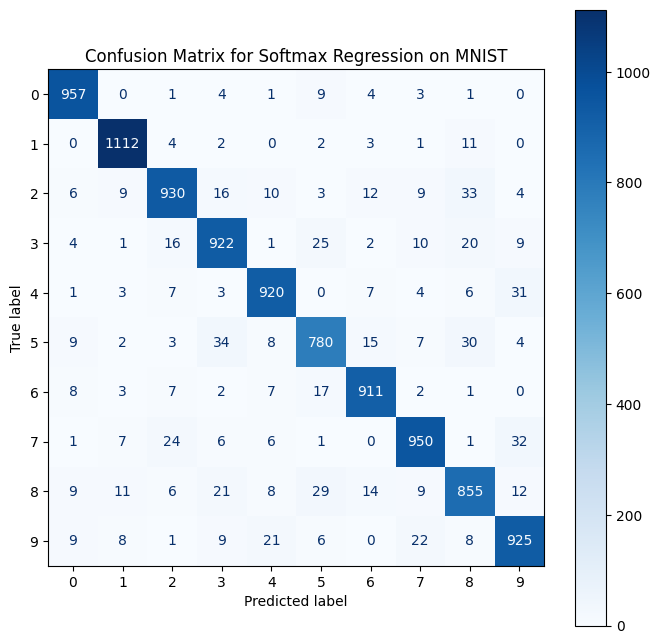

In [9]:
#found accuracy
y_pred = softmax_reg.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model accuracy on test set: {accuracy :.4f}")

#confusion matrix to see where the model is making mistakes
print("\nDisplaying confusion matrix...")
fig,ax = plt.subplots(figsize=(8,8))
print("ax",ax)
ConfusionMatrixDisplay.from_estimator(softmax_reg, X_test_scaled, y_test, ax=ax,cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Softmax Regression on MNIST")
plt.show()



In [10]:
# Pick a random image from the test set
# '195' is an exmple for wrong prediction
some_index = 2026
some_digit = X_test[some_index]
some_digit_label = y_test[some_index]
print(f"True label for the selected image: {some_digit_label}")

# Remember to scale the single image just like the training data
some_digit_scaled = some_digit / 255.0

#print(some_digit_scaled.reshape(1, -1))

# The model expects a 2D array, so we reshape our 1D image array
prediction = softmax_reg.predict(some_digit_scaled.reshape(1, -1))
print(f"Predicted label for the selected image: {prediction[0]}")

True label for the selected image: 6
Predicted label for the selected image: 6


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:227: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:227: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:227: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


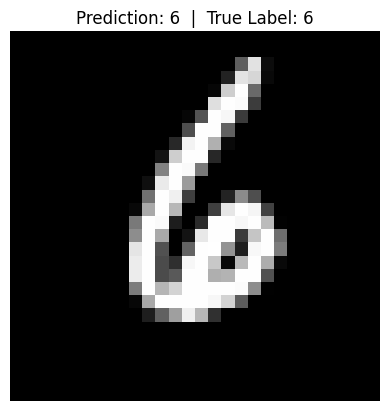

In [11]:
# Let's see the result visually!
original_image = some_digit.reshape(28, 28)
plt.imshow(original_image, cmap="gray")
plt.title(f"Prediction: {prediction[0]}  |  True Label: {some_digit_label}")
plt.axis("off")
plt.show()